In [13]:
from sklearn.base import TransformerMixin
from nltk import word_tokenize
class NLTKBOW(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [{word: True for word in word_tokenize(document)} for document in X]

Tranform the dict to Matrix
---

In [4]:
from sklearn.feature_extraction import DictVectorizer

In [5]:
from sklearn.naive_bayes import BernoulliNB

In [6]:
import os
input_filename  = os.path.join("Data", "twitter", "python_tweets.json")
labels_filename = os.path.join("Data", "twitter", "python_classes.json")

In [9]:
import json
tweets = []
with open(input_filename) as inf:
    for line in inf:
        if len(line.strip()) == 0:
            continue
        tweets.append(json.loads(line)['text'])
with open(labels_filename) as inf:
    labels = json.load(inf)

Build the pipeline for NLTKBOW, DictVectorizer, BernoulliNB
---

In [14]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('bag-of-wors', NLTKBOW()),
                    ('vectorizer', DictVectorizer()),
                    ('naive-bayes', BernoulliNB())
                    ])

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, tweets[:len(labels)], labels, scoring="f1")

In [16]:
import numpy as np
print("Score: {:.3f}".format(np.mean(scores)))

Score: 0.321


In [18]:
model = pipeline.fit(tweets[:len(labels)], labels)

In [30]:
nb = model.named_steps['naive-bayes']
nb.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [32]:
dv = model.named_steps['vectorizer']
for i, feature_index in enumerate(top_features):
    print(i, dv.feature_names_[feature_index],
         np.exp(feature_probabilities[1][feature_index]))

AttributeError: 'DictVectorizer' object has no attribute 'feature_name_'

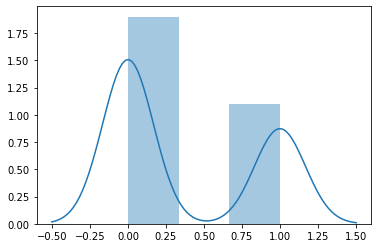

In [38]:
import seaborn as sns
sns.distplot(labels)

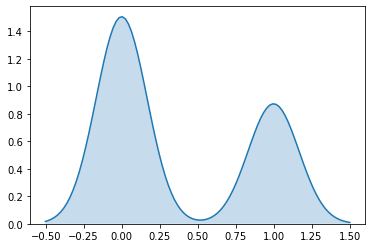

In [39]:
sns.kdeplot(data=labels, shade=True)

In [40]:
tweets[:len(labels)]

['RT @TVISoftware_CZ: Resnet 50 image adversarial attack with SSIM https://t.co/Hm7PdOplJb via @YouTube \n#DeepLearning #PyTorch #MachineLearn…',
 "RT @mnaotech: If you love programming then don't forget to check the programming hero app.\n\nhttps://t.co/qVCsn6vYrB\n\n#BigData #Analytics #D…",
 'あった。Pool と Queue は使えないけど Pipe は使える。\n\nhttps://t.co/6uVF53KVuX',
 '@WAKAYAM61708770 ありがとう♪',
 "My first #SciPy #SciPy2020 conference last year was my most world-changing conference I've attended since my first… https://t.co/MBaWfdeF5Q",
 'RT @CognitiveDave: https://t.co/7VF3nPPyoc\n\nYou can follow my entire #weekend #project on my #YouTube channel.  Building a home #sensor #ne…',
 '小学生並みの発想だけど、jsとPythonとC++全部使い分けてバインディングとかでひっつけてシステム作れたらすごないか？',
 'RT @SamueL_WonG_: "Wow can python do that?" https://t.co/dmYM3XBm5s',
 'https://t.co/7VF3nPPyoc\n\nYou can follow my entire #weekend #project on my #YouTube channel.  Building a home… https://t.co/xKIzVmPia5',
 '@edvpml Käytin python2:sta kauan sitten